<a href="https://colab.research.google.com/github/write-with-neurl/modelbit-notebooks/blob/main/Deploy_Yolo_World_Model_With_Modelbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚡ Deploying Yolo World Model to A Rest API Endpoint for Object Detection

## 🧑‍💻 Installations and Set Up

To begin, we will utilize two Python packages: `inference`, for executing zero-shot object detection using YOLO-World, and `supervision`, for post-processing and visualizing the detected objects.

In [ ]:
!pip install -q inference-gpu[yolo-world]==0.9.12rc1 supervision==0.19.0rc3 modelbit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.0/301.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.7/239.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import cv2
import supervision as sv

from tqdm import tqdm
from inference.models.yolo_world.yolo_world import YOLOWorld

[03/30/24 12:50:05] WARNING  Your inference package version 0.9.12rc1 is out of date! Please upgrade ]8;id=645164;file:///usr/local/lib/python3.10/dist-packages/inference/core/__init__.py\__init__.py]8;;\:]8;id=27411;file:///usr/local/lib/python3.10/dist-packages/inference/core/__init__.py#35\35]8;;\
                             to version 0.9.20 of inference for the latest features and bug fixes by               
                             running `pip install --upgrade inference`.                                            

In [ ]:
# Getting the current working directory, where the notebook is running and assign that directory to HOME variable

import os
HOME = os.getcwd()
print(HOME)

/content


### 🖼️ Downloading Sample Data

In [ ]:
!wget -P {HOME}/data -q https://doc.modelbit.com/img/cat.jpg
!wget -P {HOME}/data -q http://doc.modelbit.com/img/dog-in-snow.jpg

## Detection with Yolo World Pretrained Weights

The YOLO-World model, like many deep learning models, comes in different sizes to accommodate various computational and performance needs. The "S," "M," and "L" versions typically stand for "Small," "Medium," and "Large," respectively. These versions differ in the number of parameters, the size of the neural network, and consequently, their computational requirements and performance metrics such as speed and accuracy.

### Small (S) Version
The Small (S) version of the YOLO-World model is designed to be lightweight with fewer parameters and layers. This version is optimized for environments where computational resources are limited, such as edge devices or mobile phones. The trade-off for the reduced size is typically a lower accuracy compared to the larger versions. However, it can perform inference faster, which is crucial for real-time applications that require high frame rates or have strict latency requirements.

### Medium (M) Version
The Medium (M) version offers a balance between the Small and Large versions. It has more parameters and layers than the Small version, which generally leads to better accuracy in detecting objects. At the same time, it is not as computationally intensive as the Large version, making it suitable for applications that need a good balance between speed and accuracy. This version can be used in systems with moderate computational power, such as standard desktop computers or less powerful servers.

### Large (L) Version
The Large (L) version of the YOLO-World model has the highest number of parameters and layers, making it the most computationally demanding. This version is designed for scenarios where accuracy is paramount and computational resources are not a limiting factor. It is typically used in high-performance servers or workstations with powerful GPUs. The Large version will generally have the highest accuracy in object detection but at the cost of slower inference speeds compared to the Small and Medium versions.


### Detection with the YOLO world large version


In [ ]:
large_model = YOLOWorld(model_id="yolo_world/l")

In [ ]:
classes = ["dog", "cat", "couch", "snow", "human"]
large_model.set_classes(classes)

100%|███████████████████████████████████████| 338M/338M [00:07<00:00, 47.4MiB/s]


In [ ]:
image = cv2.imread('data/cat.jpg')
results = large_model.infer(image)
detections = sv.Detections.from_inference(results)

To visualize the results we've obtained, we can leverage the features of `sv.BoundingBoxAnnotator` and `sv.LabelAnnotator `from the supervision library. These annotators provide a convenient way to overlay bounding boxes and labels on the image, making it easy to interpret and understand the detected objects.

In [ ]:
BOUNDING_BOX_ANNOTATOR = sv.BoundingBoxAnnotator(thickness=2)
LABEL_ANNOTATOR = sv.LabelAnnotator(text_thickness=2, text_scale=1, text_color=sv.Color.BLACK)

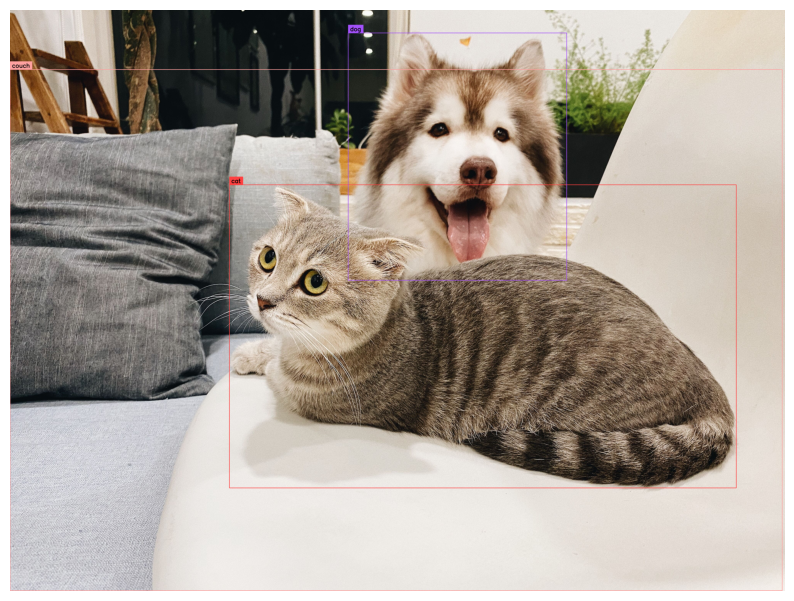

In [ ]:
annotated_image = image.copy()
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections)
sv.plot_image(annotated_image, (10, 10))

### Detection with the YOLO world medium version

In [ ]:
medium_model = YOLOWorld(model_id="yolo_world/m")

In [ ]:
medium_model.set_classes(classes)

In [ ]:
image = cv2.imread('data/dog-in-snow.jpg')
results = large_model.infer(image)
detections = sv.Detections.from_inference(results)

BOUNDING_BOX_ANNOTATOR = sv.BoundingBoxAnnotator(thickness=2)
LABEL_ANNOTATOR = sv.LabelAnnotator(text_thickness=2, text_scale=1, text_color=sv.Color.BLACK)

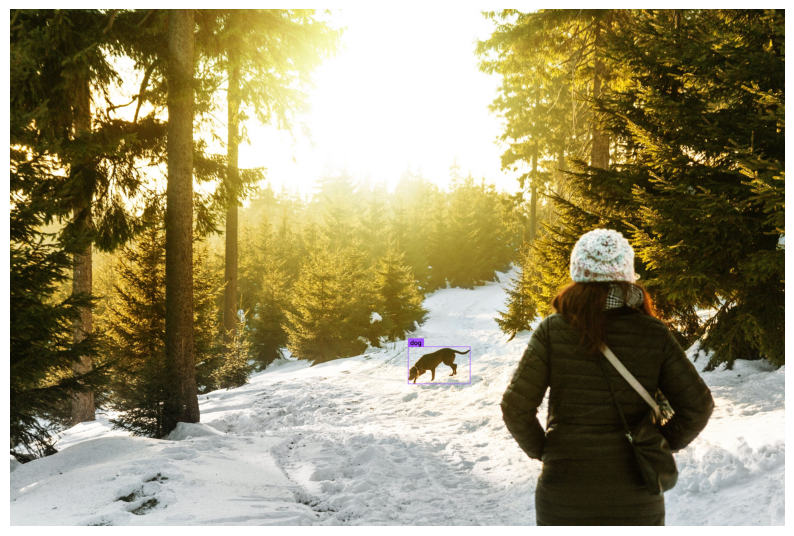

In [ ]:
annotated_image = image.copy()
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections)
sv.plot_image(annotated_image, (10, 10))

### Model Weight of choice

In our deployment, we would choose to deploy the he Medium (M) version as it offers a good balance between speed and accuracy.

## Inference Function for Object detection


The `get_labels_from_image_url` function takes an image URL as input and returns a list of labels describing the objects detected in the image. It utilizes the medium version, to perform object detection. The function first retrieves the image data from the provided URL and then applies the pre-trained model to identify objects of interest, such as dogs, cats, couches, snow, and humans. It sets the confidence threshold to 0.003 to filter out low-confidence detections. The resulting detections are then converted into a format that includes the class names and their corresponding confidence scores. Finally, the function generates a list of labels, where each label consists of the class name and its associated confidence score, providing a concise description of the objects found in the image.

In [ ]:
import requests
from PIL import Image

In [ ]:
def get_labels_from_image_url(image_url):
    # Open the image from the provided URL
    image = Image.open(requests.get(image_url, stream=True).raw)

    # Load the YOLO-World model with the medium version
    model = YOLOWorld(model_id="yolo_world/m")

    # Define the classes of interest
    classes = ["dog", "cat", "couch", "snow", "human"]
    model.set_classes(classes)

    # Perform object detection inference on the image
    results = model.infer(image, confidence=0.003)

    # Convert the inference results to detections
    detections = sv.Detections.from_inference(results)

    # Generate labels with class names and confidence scores
    labels = [
        f"{classes[class_id]} {confidence:0.3f}"
        for class_id, confidence in zip(detections.class_id, detections.confidence)
    ]

    return labels

In [ ]:
labels = get_labels_from_image_url(image_url='https://doc.modelbit.com/img/cat.jpg')
labels

['cat 0.942',
 'couch 0.811',
 'dog 0.535',
 'dog 0.056',
 'dog 0.055',
 'dog 0.037',
 'couch 0.029',
 'dog 0.028',
 'couch 0.016',
 'couch 0.014',
 'dog 0.012',
 'dog 0.011',
 'couch 0.010',
 'couch 0.009',
 'cat 0.008',
 'couch 0.005',
 'couch 0.004',
 'couch 0.004',
 'couch 0.003']

## 🚢 Deploy Yolo World with medium version to a REST API Endpoint

### 🔐 Log into `modelbit`

In [ ]:
import modelbit as mb

mb.login()

<module 'modelbit' from '/usr/local/lib/python3.10/dist-packages/modelbit/__init__.py'>

Now in this deployment we include the cloned repository and pre-trained weight of choice

In [ ]:
mb.deploy(get_labels_from_image_url,
          python_packages=[
                          "inference-gpu[yolo-world]==0.9.12rc1",
                          "supervision==0.19.0rc3",
                          "Pillow==9.4.0"],
          system_packages=["python3-opencv"],
          )

## 📩 Test the REST Endpoint with a Single Image

You can test your REST Endpoint by [sending single or batch production images](https://doc.modelbit.com/deployments/rest-api/single-inference) to it for scoring.

Use the `requests` package to POST a request to the API and use `json` to format the response to print nicely:


> ⚠️ Replace the `ENTER_WORKSPACE_NAME` placeholder with your workspace name.

In [ ]:
import json
import requests

requests.post("https://ENTER_WORKSPACE_NAME.us-east-1.modelbit.com/v1/get_labels_from_image_url/latest",
              headers={"Content-Type":"application/json"},
              data=json.dumps({"data": ["https://doc.modelbit.com/img/cat.jpg"]})).json()

{'data': ['cat 0.942',
  'couch 0.810',
  'dog 0.535',
  'dog 0.056',
  'dog 0.055',
  'dog 0.037',
  'couch 0.029',
  'dog 0.028',
  'couch 0.016',
  'couch 0.014',
  'dog 0.012',
  'dog 0.011',
  'couch 0.010',
  'couch 0.009',
  'cat 0.008',
  'couch 0.005',
  'couch 0.004',
  'couch 0.004',
  'couch 0.003']}

You can also test your endpoint from the command line using:


> `curl -s -XPOST "https://ENTER_WORKSPACE_NAME.us-east-1.modelbit.com/v1/get_labels_from_image_url/latest" -d '{"data": ["https://doc.modelbit.com/img/cat.jpg"]}' | json_pp`

---
> ⚠️ Replace the `ENTER_WORKSPACE_NAME` placeholder with your workspace name.